In [6]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [ ]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

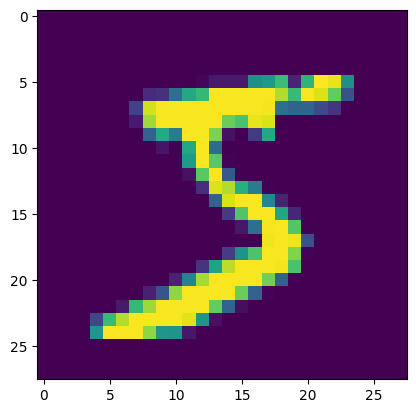

In [2]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])

In [3]:
#check image shape
X_train[0].shape

(28, 28)

In [4]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
# The first number is the number of images (60,000 for X_train and 10,000 for X_test).
# Then comes the shape of each image (28x28).
# The last number is 1, which signifies that the images are greyscale.

In [5]:

#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [8]:
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [9]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 96s 50ms/step - loss: 0.2539 - accuracy: 0.9477 - val_loss: 0.0882 - val_accuracy: 0.9722
Epoch 2/3
1875/1875 [==============================] - 93s 50ms/step - loss: 0.0690 - accuracy: 0.9793 - val_loss: 0.0789 - val_accuracy: 0.9755
Epoch 3/3
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0489 - accuracy: 0.9845 - val_loss: 0.0856 - val_accuracy: 0.9770


In [11]:
#predict first 4 images in the test set
model.predict(X_test[:4])

1/1 [==============================] - 0s 63ms/step


array([[6.0126842e-10, 3.0652838e-14, 7.6205382e-08, 1.8534489e-07,
        8.0478999e-14, 4.6473003e-12, 6.8396409e-18, 9.9999964e-01,
        7.4272510e-10, 3.0479241e-09],
       [3.4748150e-06, 1.5041531e-05, 9.9997795e-01, 2.9098693e-08,
        6.4150696e-10, 3.1544606e-12, 3.5592132e-06, 2.6983254e-14,
        4.2166448e-08, 4.3887115e-14],
       [1.0452722e-03, 9.9869508e-01, 9.7094729e-05, 1.5626432e-07,
        2.8155249e-05, 2.0342447e-06, 1.0821921e-06, 7.8617246e-09,
        1.3115336e-04, 9.0161940e-09],
       [9.9999988e-01, 2.5581216e-16, 7.3134050e-09, 3.0504994e-14,
        1.5873369e-10, 6.5769350e-09, 8.2822801e-08, 5.8819432e-14,
        4.7416970e-10, 6.6740176e-11]], dtype=float32)

In [12]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)